# Self Organizing Map

## Install MiniSom Package

In [1]:
!pip install MiniSom

### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [15]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values
#we don't train our model. It's unsupervised. We want to get the data of those who got rejected in their application

## Feature Scaling


In [14]:
#we normalize our data. 0-1 values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM


In [21]:
from minisom import MiniSom
#x and y are the dimensions of the SOM. We don't have that many customers so we choose 10x10
#input_len the number of features we have in our dataset. So we need 14+1 = 15
#sigma = the radius of the different neighboors in the grid. default value is 1
#learning_rate = hyperparameter decides how much the weights are updated dfuring each iteration
# The bigger it is the faster it converges. Default values is 0.5
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
#we initialize our weights with random values close to 0 but not 0
som.random_weights_init(X)
#we train our SOM on X. This will apply the steps 4 to 9 for as many iterations as we want
#In this particual case we try with 100 iterations!
som.train_random(data = X, num_iteration = 100)

## Visualizing the results


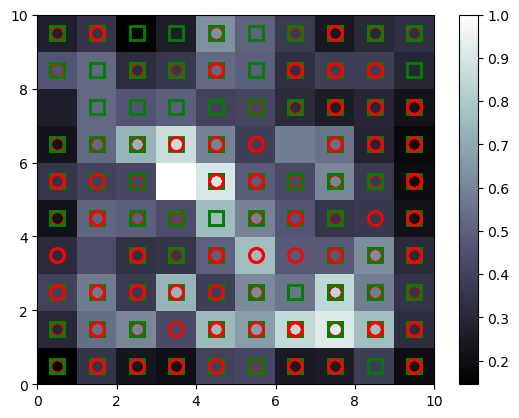

In [23]:
#the whitter it is the closer to the winning neuron

from pylab import bone, pcolor, colorbar, plot, show
bone() #the window that will contain the map. WE just get a white window without anything in it
#put the different winning modes in the map
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [9]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [10]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15594305
15662189
15568469
15782159
15586479
15717700
15705379
15646535
15749964
15683168
15618410
15682860
15788776
15765257
15764226
15621423
15767231
15690492
15762716
15706464
15637891
15627190
15568878
15638871
15761047
15687527
15605276
15717065
15721569
15646563
15652048
15580366
15771409
15814116
15674750
15583552
15594651
